In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data/CASchools.csv")
data.head()

,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math,size,score
0,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976,690.000000,17.889909,690.799988
1,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000,661.900024,21.524664,661.200012
2,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988,650.900024,18.697225,643.600006
3,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024,643.500000,17.357143,647.700012
4,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988,639.900024,18.671329,640.850006


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
numeric_features = ["students", "teachers", "calworks", "lunch", "computer", "expenditure", "income"]
categorical_features = ["county", "grades"]

X = data[numeric_features+categorical_features]
y = data.read

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
X[numeric_features].head()

,students,teachers,calworks,lunch,computer,expenditure,income
0,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001
1,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000
2,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000
3,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000
4,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [6]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())])

pipeline.fit(X_train[numeric_features], y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [7]:
r2_score(y_test, pipeline.predict(X_test[numeric_features]))

0.8083078681288711

In [8]:
pipeline.named_steps["model"].coef_

array([ -5.34922232,   3.40620508,   1.58942431, -16.80398733,
         0.57474973,   2.15571779,   2.54716239])

In [9]:
importances = np.abs(pipeline.named_steps["model"].coef_)

In [10]:
indices = np.argsort(importances)
p = len(importances)
colors = np.array(["red", "green"])[(np.sign(pipeline.named_steps["model"].coef_)>0).astype(int)]

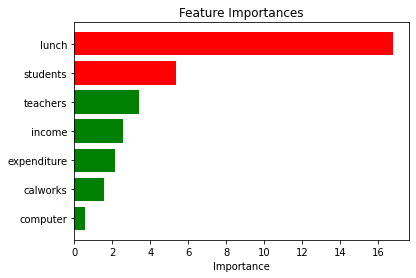

In [11]:
plt.title('Feature Importances')
plt.barh(range(p), importances[indices], color=colors[indices])
plt.yticks(range(p), np.array(numeric_features)[indices])
plt.xlabel('Importance')
plt.show()

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [13]:
model = DecisionTreeRegressor(min_samples_leaf=5)
model.fit(X_train[numeric_features], y_train)

DecisionTreeRegressor(min_samples_leaf=5)

In [14]:
r2_score(y_test, model.predict(X_test[numeric_features]))

0.6835538073161102

In [15]:
model.feature_importances_

array([0.01521429, 0.01339342, 0.01226134, 0.87310021, 0.01115376,
       0.02540334, 0.04947364])

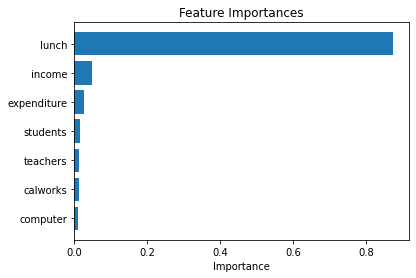

In [16]:
importances= model.feature_importances_

indices = np.argsort(importances)
p = len(importances)
plt.title('Feature Importances')
plt.barh(range(p), importances[indices])
plt.yticks(range(p), np.array(numeric_features)[indices])
plt.xlabel('Importance')
plt.show()

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [18]:
numeric_features

['students',
 'teachers',
 'calworks',
 'lunch',
 'computer',
 'expenditure',
 'income']

In [19]:
categorical_features

['county', 'grades']

In [20]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(300, min_samples_leaf=2))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['students', 'teachers',
                                                   'calworks', 'lunch',
                                                   'computer', 'expenditure',
                                                   'income']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['county', 'grades'])])),
                ('model',
                 RandomForestRegressor(min_samples_leaf=2, n_estimators=300))])

In [21]:
r2_score(y_test, pipeline.predict(X_test))

0.7781714616226801

In [22]:
importances = pipeline.named_steps["model"].feature_importances_

In [23]:
fitted_preprocessor = pipeline.steps[0][1]

In [24]:
feature_names = fitted_preprocessor.get_feature_names_out()

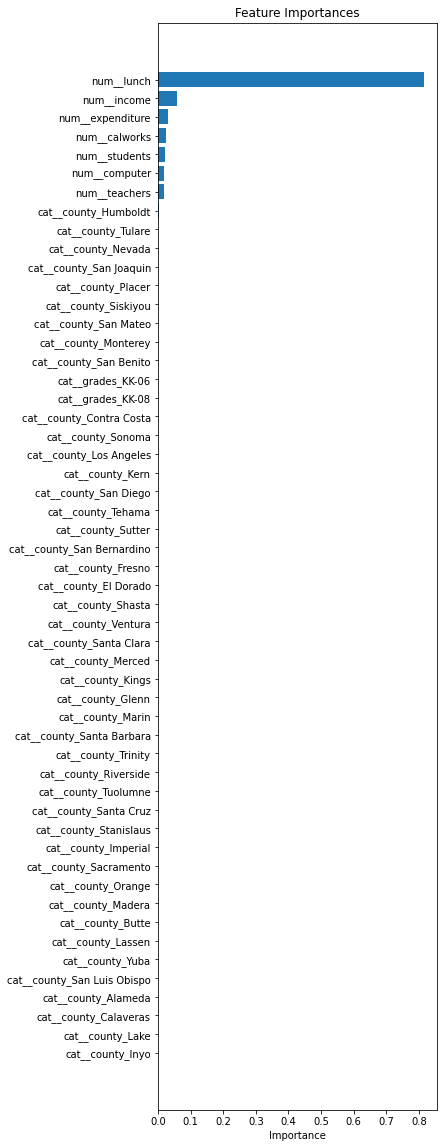

In [25]:
plt.figure(figsize=(5,20))
indices = np.argsort(importances)
p = len(importances)
plt.title('Feature Importances')
plt.barh(range(p), importances[indices])
plt.yticks(range(p), np.array(feature_names)[indices])
plt.xlabel('Importance')
plt.show()